# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as
import pandas as pd
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
filepath = '/content/previsao_de_renda.csv'

df = pd.read_csv(filepath_or_buffer=filepath)

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [ ]:
df.drop(columns=['Unnamed: 0', 'index', 'mau'], inplace=True)

print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB
None 



In [ ]:
print('Quantidade de linhas duplicadas:', df.duplicated().sum())

Quantidade de linhas duplicadas: 453


In [ ]:
print('Quantidade total de linhas:', len(df), '\n')

print('Quantidade após remoção das linhas duplicadas:',
      len(df.drop_duplicates()), '\n')

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

Quantidade total de linhas: 15000 

Quantidade após remoção das linhas duplicadas: 14547 



,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,3018.59
14543,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14544,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14545,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [ ]:
# Cria um objeto LabelEncoder
le = LabelEncoder()

# Itera sobre as colunas do DataFrame
for column in df.columns:
    # Verifica se a coluna contém strings
    if df[column].dtype == 'object':
        # Aplica o LabelEncoder para transformar strings em valores numéricos
        df[column] = le.fit_transform(df[column])



In [ ]:
# Matriz de correlação

df.corr()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,1.000000,-0.001835,0.002758,0.003972,0.015161,-0.010618,0.131464,-0.017099,0.005910,-0.003443,-0.000650,0.015760,0.007723
sexo,-0.001835,1.000000,0.372424,-0.043693,0.128157,-0.143320,0.015113,-0.143498,0.008882,-0.218327,-0.145187,0.161534,0.181065
posse_de_veiculo,0.002758,0.372424,1.000000,-0.014080,0.110330,-0.084712,0.087057,-0.146453,0.006605,-0.159355,-0.086039,0.157866,0.061308
posse_de_imovel,0.003972,-0.043693,-0.014080,1.000000,-0.002239,0.049038,-0.036913,-0.017315,-0.165868,0.123009,0.000084,-0.006123,0.029957
qtd_filhos,0.015161,0.128157,0.110330,-0.002239,1.000000,-0.119438,0.056631,-0.150416,0.021786,-0.368619,-0.074090,0.895710,0.009206
tipo_renda,-0.010618,-0.143320,-0.084712,0.049038,-0.119438,1.000000,-0.001391,0.062151,0.000071,0.325270,0.064058,-0.114293,0.009838
educacao,0.131464,0.015113,0.087057,-0.036913,0.056631,-0.001391,1.000000,-0.010638,-0.008496,-0.185393,-0.018427,0.037644,0.044278
estado_civil,-0.017099,-0.143498,-0.146453,-0.017315,-0.150416,0.062151,-0.010638,1.000000,-0.004307,0.080674,-0.008645,-0.409268,-0.045074
tipo_residencia,0.005910,0.008882,0.006605,-0.165868,0.021786,0.000071,-0.008496,-0.004307,1.000000,-0.037294,0.000313,0.010036,-0.028760
idade,-0.003443,-0.218327,-0.159355,0.123009,-0.368619,0.325270,-0.185393,0.080674,-0.037294,1.000000,0.322335,-0.342854,0.042837


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com renda é tempo_emprego, com um índice de correlação de 39%, enquanto as demais variáveis não ultrapassam 1%.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

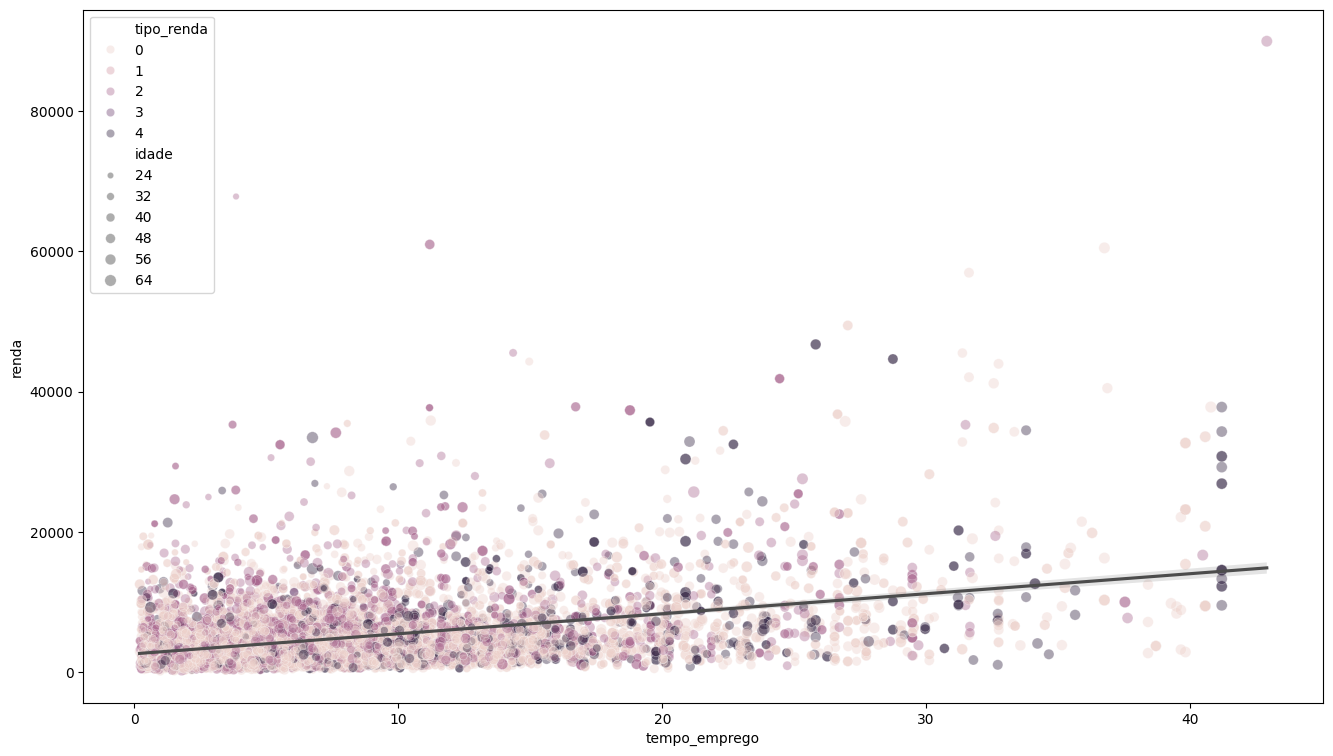

In [ ]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='idade',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.3')

plt.show()

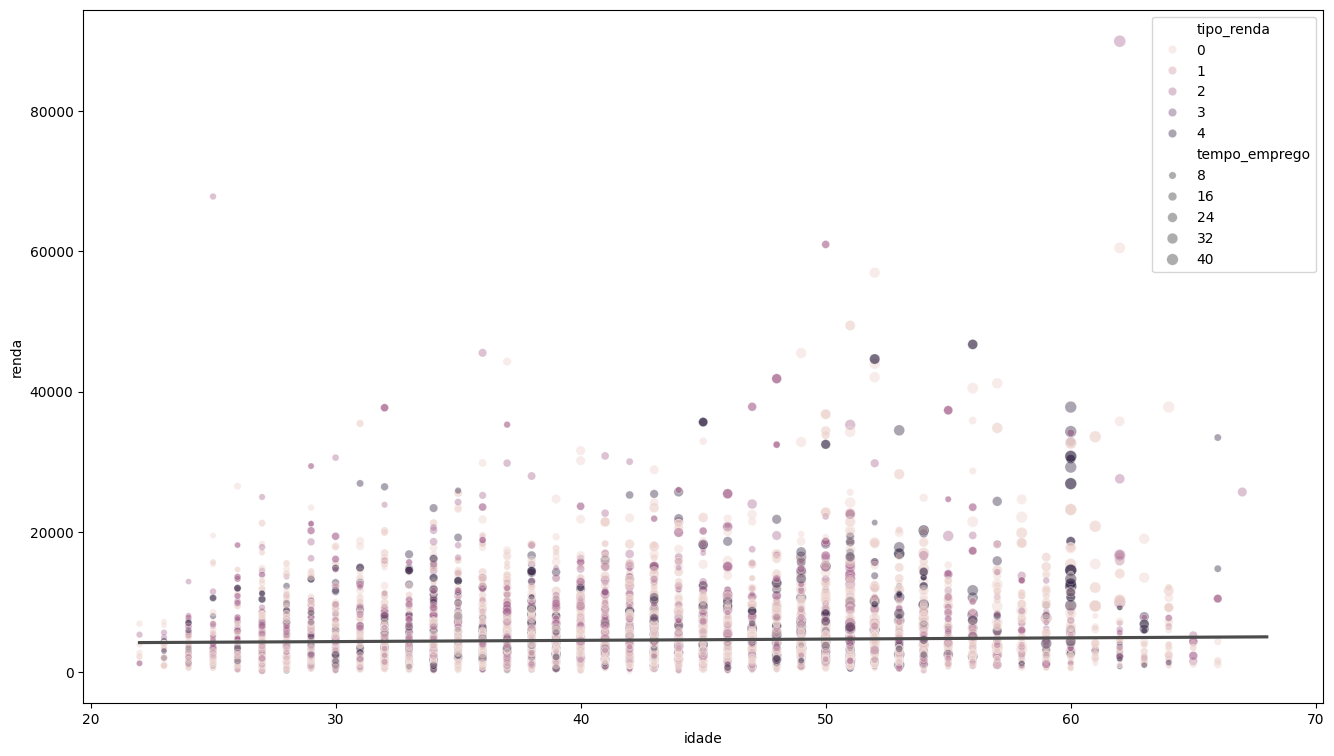

In [ ]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='tempo_emprego',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', y='renda', data=df, scatter=False, color='.3')

plt.show()

A correlação entre a variável tempo_emprego e a variável renda não é tão alta, é possível visualizar a covariância com a inclinação da linha de tendência. No entanto, a variável idade, que apresentou a segunda maior correlação, possui uma inclinação baixa.

3) Na su aopinião, há outliers na variável renda?

Sim. Como Falado anteriormente, existe a presença de outliers na variável renda de clientes com o tipo de renda empresarial, porém, devido à baixa incidência, é possível que esses outliers não afetem significativamente os resultados de tendência.


4) Calcule o logaritmo da variável renda e repita a sequência de análise

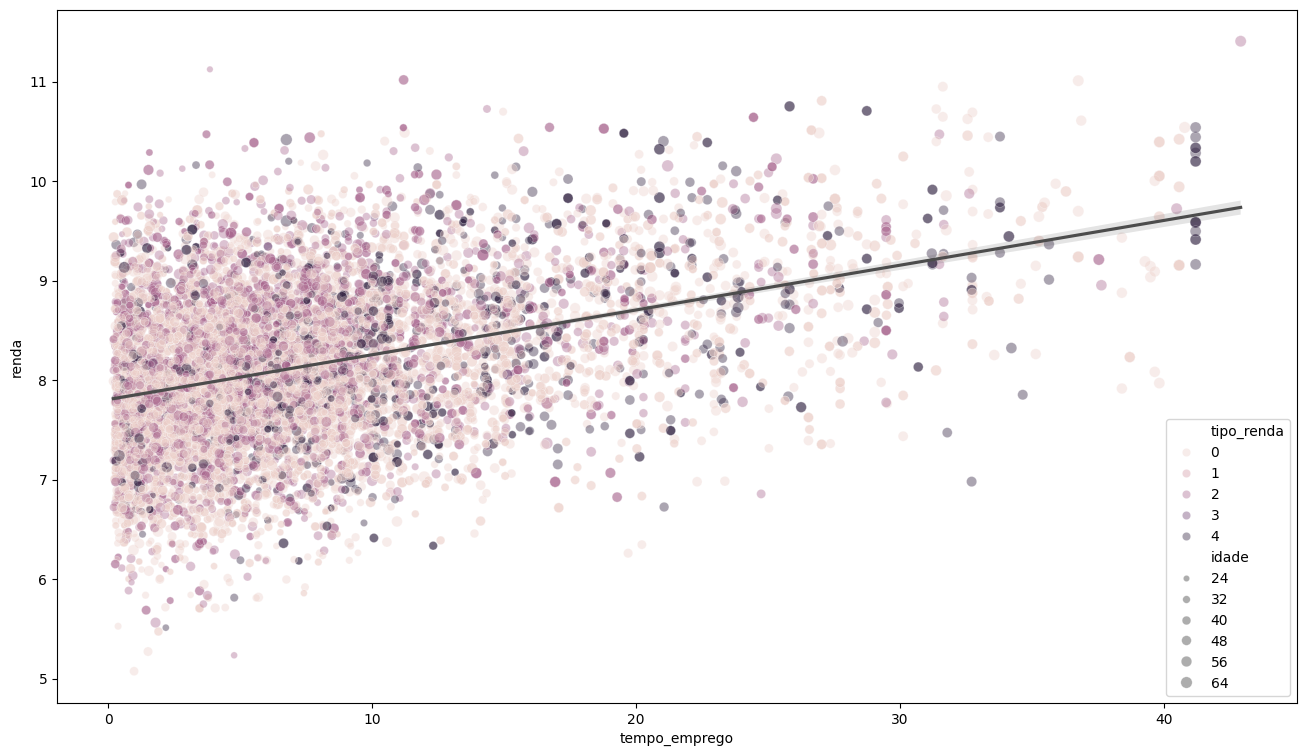

In [ ]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego',
            y='renda',
            data=df_log,
            scatter=False,
            color='.3')

plt.show()

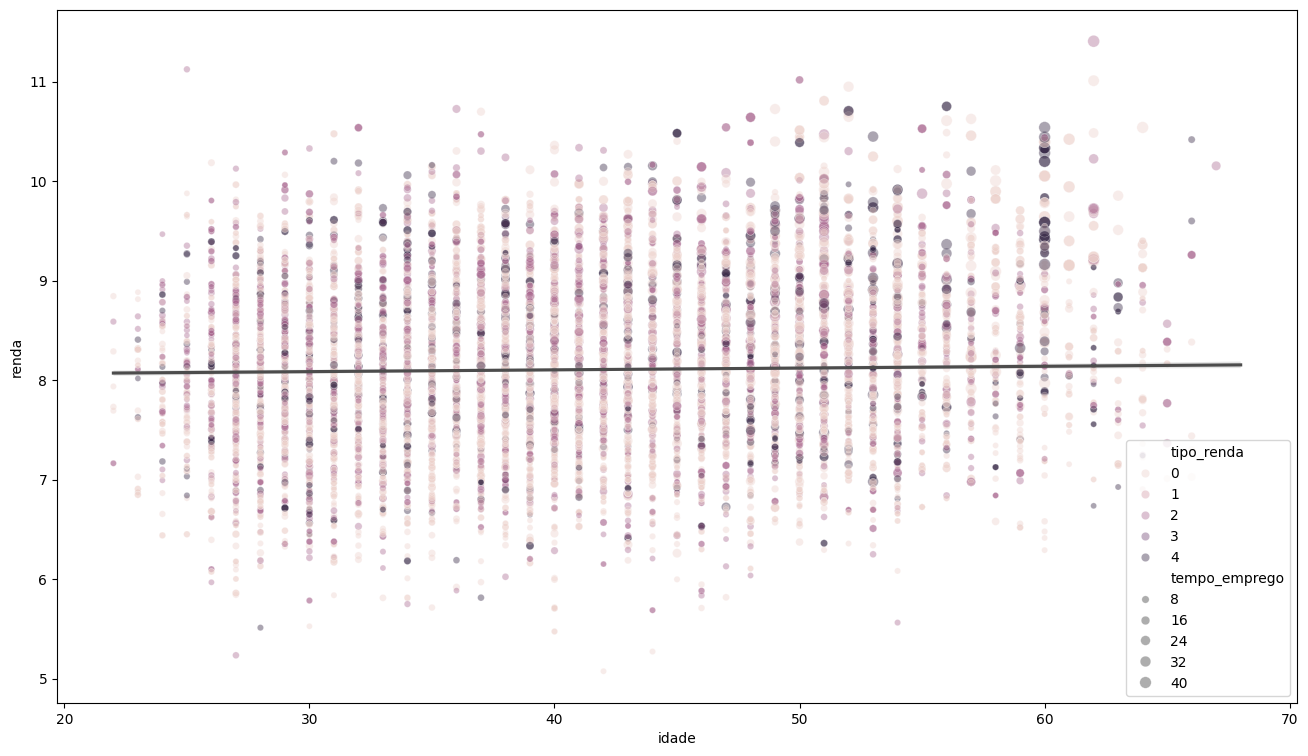

In [ ]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='tempo_emprego',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade',
            y='renda',
            data=df_log,
            scatter=False,
            color='.3')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# Diferença após aplicação do LOG:

pd.concat(objs=[df.corr().tail(1),
                df_log.corr().tail(1)],
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda',
                                                1:'renda_log'})

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.007723,0.181065,0.061308,0.029957,0.009206,0.009838,0.044278,-0.045074,-0.028760,0.042837,0.394918,0.020118,1.0
renda_log,0.005807,0.236679,0.088684,0.045165,0.022322,0.003485,0.048006,-0.053467,-0.026611,0.025143,0.380039,0.034614,1.0


Visualizo com a matriz de correlação que a aplicação do LOG fez com que alterasse a correlação entre as variáveis, sendo que algumas aumentaram e outras diminuíram, enquanto visualmente, a análise melhorou principalmente na correlação entre renda e tempo_emprego, pois reduziu a dispersão dos pontos e os concentrou, facilitando a compreensão da linha de tendência que aparentemente apresenta uma maior inclinação. Em relação à variável idade, embora a inclinação permaneça a mesma, é possível visualizar mais claramente a representação geral entre os valores inferiores e superiores.